# About this NoteBook
An overview of the RF2 dataset.

The reason I created this notebook was to introduce the dataset and add the proper methods to import the dataset. I could not find any related description regarding this dataset; Therefore, I tried to have brief information regarding the dataset here.


#### Author: [Seyedsaman Emami](https://github.com/samanemami)

# Importing Library

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")

# Data Entry

In [2]:
def dt(path):
    df = arff.loadarff(path)
    df = pd.DataFrame(df[0])
    return df
path = "../input/river-flowrf2/"

## Return the dataset input and targets
name is the string value of the dataset name

d is the number of features

In [3]:
d = 576
dt_name = "rf2.arff"
dt_path = os.path.join(path, dt_name)
df = dt(dt_path)
X = (df.iloc[:, :d]).values
y = (df.iloc[:, d:]).values

In [4]:
df.head(5)

,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__-6,NASI2__-6,...,napm7_42to48hr__-60,dldi4_42to48hr__-60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
0,288.0,3.41,276.0,194.0,63.8,8.78,166.0,59.5,NaN,NaN,...,NaN,NaN,269.0,3.33,257.0,186.0,61.2,8.07,157.0,55.1
1,287.0,3.40,275.0,194.0,64.1,8.81,165.0,59.4,NaN,NaN,...,NaN,NaN,269.0,3.32,257.0,185.0,61.1,8.04,157.0,55.2
2,288.0,3.39,274.0,193.0,63.4,8.88,165.0,59.4,NaN,NaN,...,NaN,NaN,268.0,3.32,257.0,186.0,61.3,8.14,156.0,55.2
3,287.0,3.39,273.0,193.0,64.0,8.70,164.0,57.9,NaN,NaN,...,NaN,NaN,268.0,3.33,257.0,185.0,61.2,8.21,156.0,55.9
4,287.0,3.34,273.0,193.0,64.0,8.78,165.0,57.9,NaN,NaN,...,NaN,NaN,266.0,3.31,257.0,185.0,61.4,8.04,156.0,55.9


The inputs are the time-lagged observations from 6, 12, 18, 24, 36, 48, and 60 hours in the past for eight different rivers.

## Extra information (Click)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Columns: 584 entries, CHSI2__0 to DLDI4_48H__0
dtypes: float64(584)
memory usage: 40.7 MB


In [6]:
print(X.shape, y.shape)

(9125, 576) (9125, 8)


## Dataset overview

<AxesSubplot:>

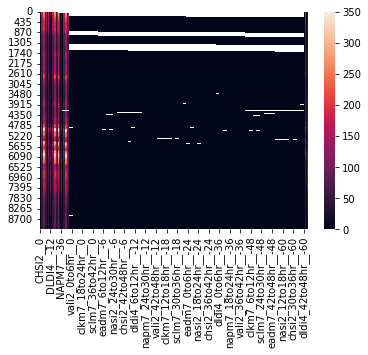

In [7]:
sns.heatmap(df)

## Missing values

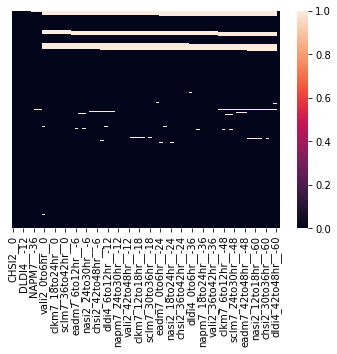

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True)
plt.show()

Each new time-lagged attribute has the missing value equal to the lag

In [9]:
# Total number of Missing values
print(df.isnull().sum(axis=1))

0       568
1       568
2       568
3       568
4       568
       ... 
9120      0
9121      0
9122      0
9123      0
9124      0
Length: 9125, dtype: int64


#### As the reference did not talk about the method of dealing with the missing values, I preferred to delete the related indexes.

In [10]:
df.shape

(9125, 584)

In [11]:
df_new = df.dropna(axis=1)
df_new.shape

print("Missing values:", df_new.isnull().sum(axis=1).sum())

Missing values: 0
